# Introduction to dynamic programming with discrete states and discrete actions

This notebook solves problem 3 in homework 1, it is based off of Marlon's notebook.

In [1]:
import numpy as np

# If you change any of these values, comment out the assertions

N = 500 # number of grid-points for the capital grid
k_low = 0.1 # lower bound for the capital grid
k_high = 10 # upper bound for capital grid
k_grid = np.linspace(k_low, k_high, N).reshape(1, N) #grid for capital

# Now we initialize the value function, I like to initialize it to zero.
V_init = np.zeros((2, N))

In [2]:
# I start out with some functions, which may be helpful
# If you change the parameters, the assertions don't make sense anymore
gamma = 2.
beta = 0.9

def u(c, gamma=gamma):
    """
    input: 
    c: consumption
    
    output:
    utility received from consumption
    """
    return np.log(c)

# hint: try to understand what this function does first, it is useful for vf_update!
def actionvalue_allchoices(k_index, V_old):
    """
    input:
    k_index: index so that k_grid[index] corresponds to value of capital this period (state)
    V_old: approximation to the value function. V_old[i] approximates V(k_grid[i]).
    
    output:
    action_value: value of all possible state-action pairs.
    """
    k = k_grid[0,k_index]
    action_value = np.zeros_like(V_old)
    
    c = np.zeros_like(V_old)
    c[0,:] = 0.9*k**0.3 + 0.3 * k - k_grid
    c[1,:] = 1.1*k**0.3 + 0.9* k -k_grid
    
    action_value[c<=0] = -999999
    action_value[c>0] = u(c[c>0])
    
    E_V_old = V_old.mean(axis=0).reshape(1,N)

    action_value += beta*E_V_old
    
    return action_value

def vf_update(i, V_old):
    """
    input:
    i: index corresponding to the entry of the value-function vector which is updated
    V_old: value function vector from the previous iteration
    
    output:
    Vi_new: updated value for the value function vector at entry i.
    """
    
    Vi_new = actionvalue_allchoices(i, V_old).max(axis=1)
    
    return Vi_new

In [3]:
def vf_update_iteration(V_old):
    """
    input: 
    V_old: array with current approximation of the value function
    
    output:
    V_new: updated approximation of the value function
    """
    V_new = np.zeros_like(V_old)
    
    for i in range(V_new.shape[1]):
        V_new[:,i] = vf_update(i, V_old)
     
    return V_new

Converged after iteration 215


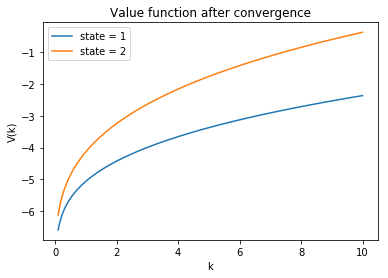

In [5]:
from matplotlib import pyplot as plt

difference_list = []
threshold = 1e-10
max_iterations = 10000
plot_interval = 50

V = V_init.copy()

for iteration in range(max_iterations):
    V_new = vf_update_iteration(V)
    difference = np.max(np.abs(V_new-V))
    difference_list.append(difference) # Nothing todo here
    V = V_new.copy()
    
    
    if difference < threshold:
        print('Converged after iteration {}'.format(iteration + 1))
        
        plt.figure()
        plt.plot(k_grid[0,:], V[0,:], label='state = 1')
        plt.plot(k_grid[0,:], V[1,:], label = 'state = 2')
        plt.legend()
        plt.xlabel('k')
        plt.ylabel('V(k)')
        plt.title('Value function after convergence')
        plt.show();
        break
        
    if iteration%plot_interval == 50:
        
        plt.figure()
        plt.plot(np.arange(1, iteration+2), np.log10(np.array(difference_list)))
        plt.xlabel('Iteration')
        plt.ylabel('Maximum update [log10]')
        plt.show();

In [6]:
def extract_policy(V):
    """
    input:
    V: value function array
    
    output:
    p: polcy function array
    """
    p = np.zeros_like(V)
    print(p.shape)
    for i in range(p.shape[1]):
        action_value = actionvalue_allchoices(i, V)
        p[:,i] = k_grid[0,action_value.argmax(axis=1)]
    
    return p

(2, 500)


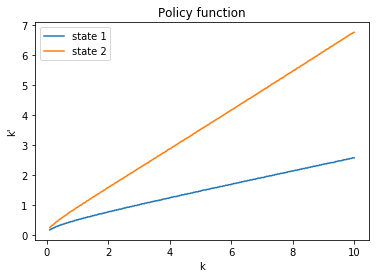

In [7]:
plt.figure()
policy = extract_policy(V)
plt.plot(k_grid[0,:], policy[0,:], label='state 1')
plt.plot(k_grid[0,:], policy[1,:], label='state 2')
plt.xlabel('k')
plt.ylabel("k'")
plt.title('Policy function')
plt.legend()
plt.show();